In [4]:
import pandas as pd

# URL
url = 'https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv'

# Read data using URL and create a DataFrame
titanic_df = pd.read_csv(url)

In [5]:
print(titanic_df.head())
print("--------------------------------")
print(titanic_df.info())
print("--------------------------------")
print(titanic_df.describe())
print("--------------------------------")
print(titanic_df.columns)
print("--------------------------------")
print(titanic_df.shape)
print("--------------------------------")
print(titanic_df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
--

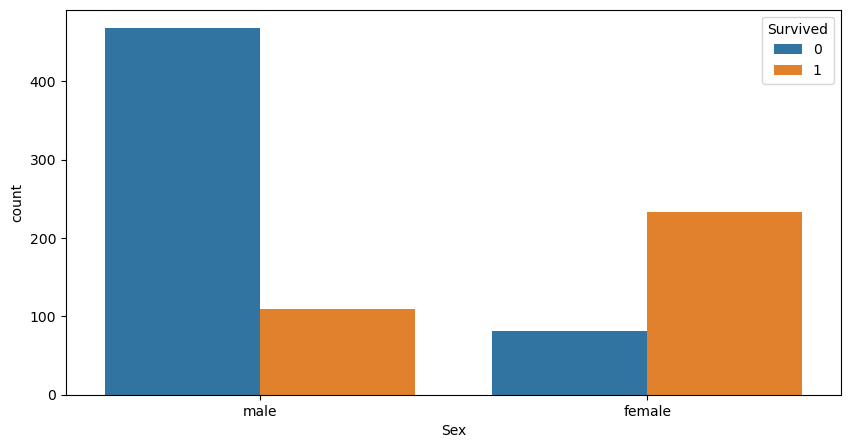

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.show()

In [7]:
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

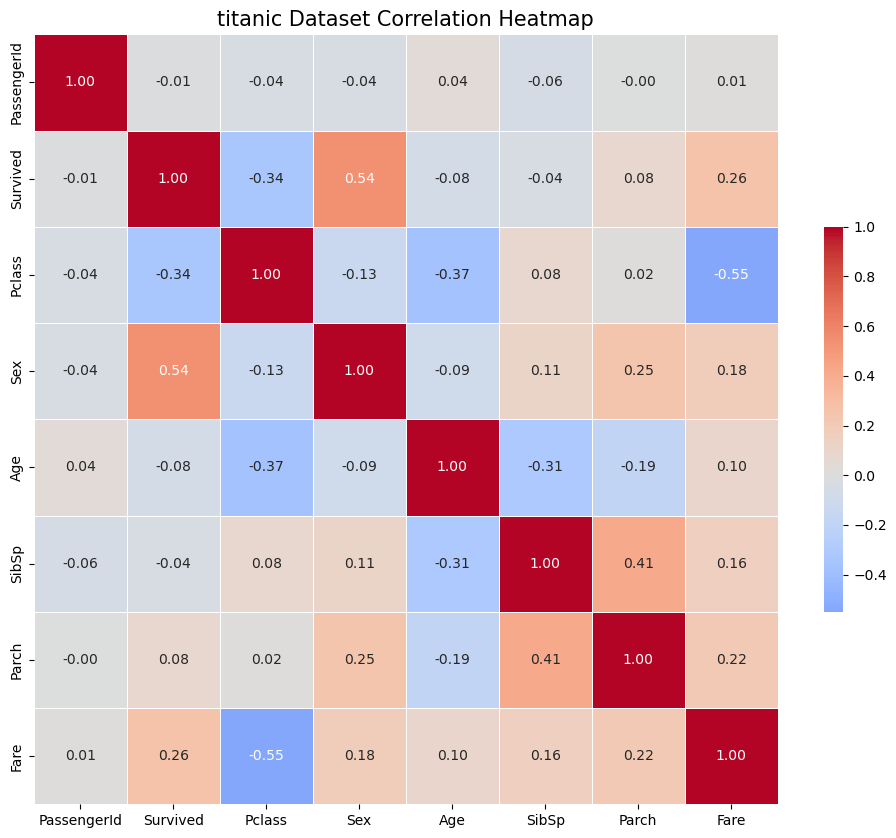

In [8]:
import numpy as np

numeric_cols = titanic_df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10)) 
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}
)
plt.title("titanic Dataset Correlation Heatmap", fontsize=15)
plt.show()

In [9]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']
X = titanic_df[features]
y = titanic_df['Survived']

X = X.fillna(0) 

In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [11]:
jack = [[3, 0, 0, 0, 7]]
prediction_jack = model.predict(jack)
print("Jack's predict result:", prediction_jack)

rose = [[1, 1, 2, 2, 32]]
prediction_rose = model.predict(rose)
print("Rose's predict result:", prediction_rose)

Jack's predict result: [0]
Rose's predict result: [1]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Number of train dataset:", len(X_train))
print("Number of test dataset:", len(X_test))

Number of train dataset: 712
Number of test dataset: 179


In [13]:
model_new = DecisionTreeClassifier()
model_new.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
predictions = model_new.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7653631284916201


confusion matrix: [[90 13]
 [29 47]]


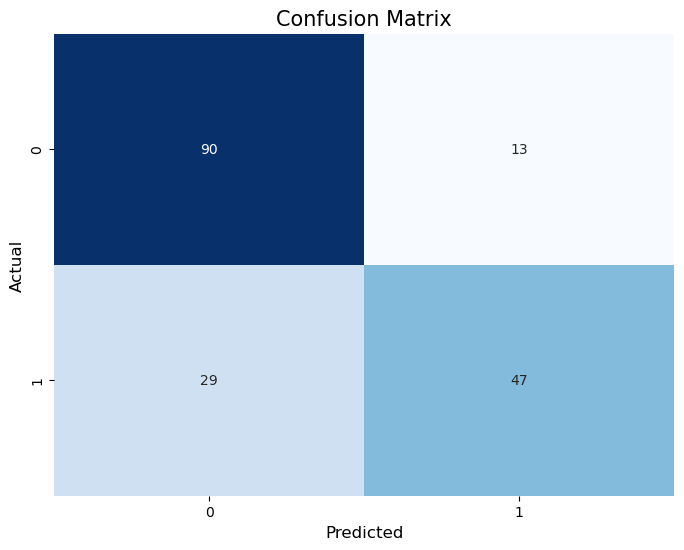

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrix = confusion_matrix(y_test, predictions)
print("confusion matrix:", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix", fontsize=15)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

In [16]:
import pandas as pd
from sklearn.datasets import load_wine

In [17]:
wine_data = load_wine()
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target

In [18]:
print(wine_df.head())
print("--------------------------------")
print(wine_df.info())
print("--------------------------------")
print(wine_df.describe())
print("--------------------------------")
print(wine_df.isnull().sum())
print("--------------------------------")
print(wine_df.shape)
print("--------------------------------")
print(wine_df.columns)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

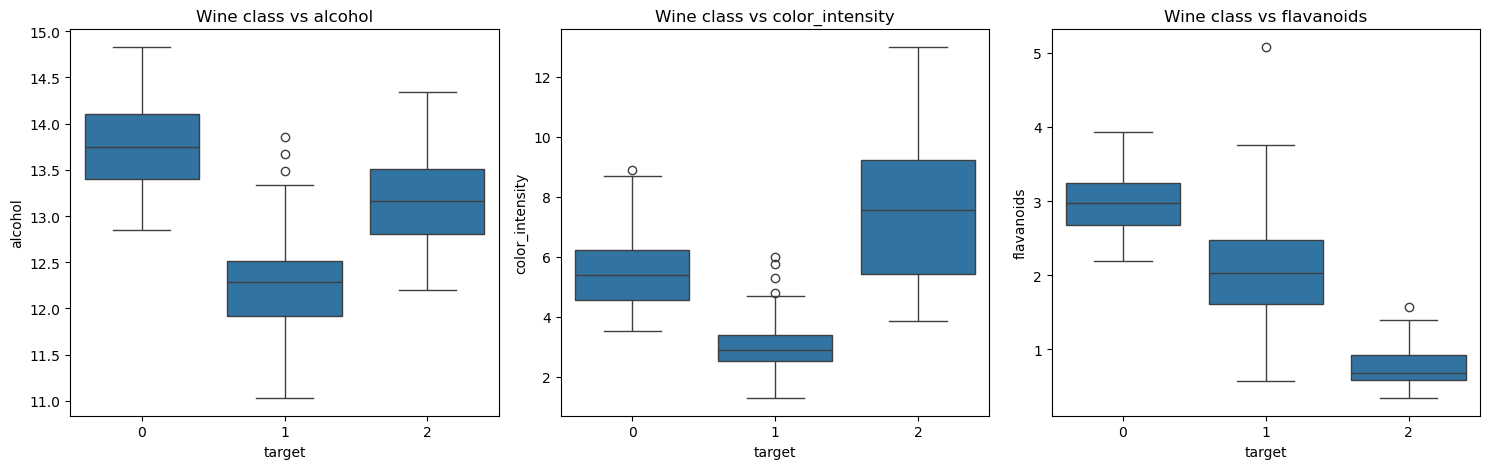

In [19]:
feature_to_plot = ['alcohol', 'color_intensity', 'flavanoids']

plt.figure(figsize=(15, 5))

for i, feature in enumerate(feature_to_plot):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='target', y=feature, data=wine_df)
    plt.title(f"Wine class vs {feature}")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()